# <font color='GREEN'>  MINIPROYECTO 2 <FONT>

## <font color='Orange'>  Part 1: Regresión lineal <FONT>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,  r2_score
import seaborn as sns
import random
from PIL import Image
%matplotlib inline

In [2]:
# LISTA DE 100 NUMEROS RANDOM 
def variables(mi,ma,cant):
    return [random.uniform(mi,ma) for x in range(0,cant)]

In [3]:
#VARIABLE INDEPENDIENTE CON 3 DECIMALES 
X = np.array(variables (0,3,100)).round(3)

In [4]:
# MAGNITUD DEL VECTOR (-2,5)
v= np.array([-2,5])
U = round(np.linalg.norm(v),3)  
U

5.385

In [5]:
def f(x): #y = 2X + 5 + u(-2,5)
    y = (2*x+ 5+ U)
    return y

In [6]:
#VARIABLE DEPENDIENTE 
Y = f(X)

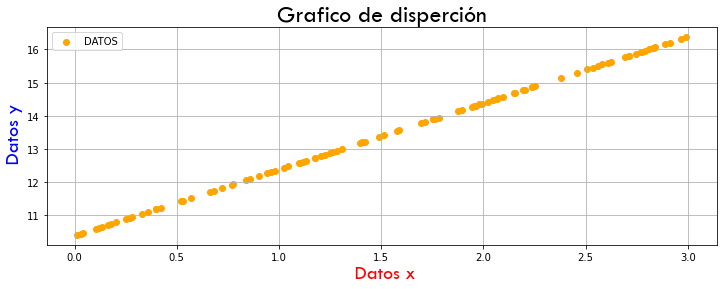

In [7]:
# GRAFICO DE DISPERCION

fig, ax= plt.subplots(figsize =(12,4))
ax.scatter(X,Y, label = 'DATOS', color = 'orange')
plt.xlabel(' Datos x', fontname = 'Tw Cen MT', color = 'red', size =20)
plt.ylabel(' Datos y', fontname = 'Tw Cen MT', color = 'blue',size =20)
plt.title('Grafico de disperción', fontname = 'Tw Cen MT', size =24)
plt.grid()
plt.legend(loc ='upper left')
plt.show()

In [8]:
#REGRESION LINEAL 
regresion_lineal = LinearRegression()

In [9]:
# GRAFICO DE REGRECION LINEAL

In [10]:
regresion_lineal.fit(X.reshape(-1,1),Y)

LinearRegression()

<p> Ecuacion de la regrecion lineal <p>
                   $$ y = wx + b $$

In [11]:
print('El valor de w = ' + str(regresion_lineal.coef_) + ' y el valor de b = ' + str(  round((regresion_lineal.intercept_),3)))

El valor de w = [2.] y el valor de b = 10.385


In [12]:
# ERROR CUADRATICO MEDIO 
prediccion = regresion_lineal.predict(X.reshape(-1,1))

mse = mean_squared_error(y_true = Y, y_pred = prediccion)

rmse = np.sqrt(mse)
print('Error cuadratico medio (MSE) = ' + str(mse))
print('Raiz del errro cuadratico medio = ' + str(rmse))

Error cuadratico medio (MSE) = 7.036639274571425e-30
Raiz del errro cuadratico medio = 2.652666446157795e-15


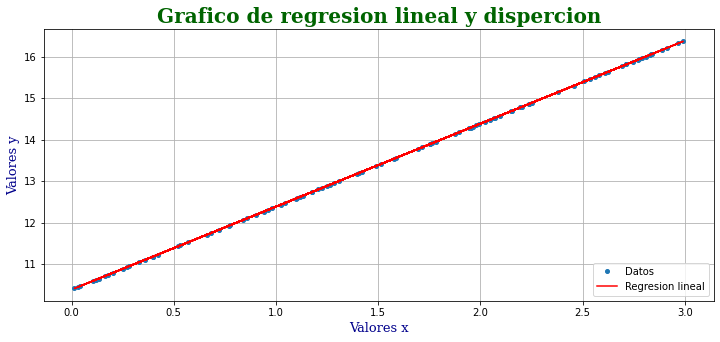

In [13]:
#GRAFICO DE REGRECION SOLUCION
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(X,Y, 'o',markersize = 4, label = 'Datos')
plt.plot(X,Y, 'r-', label = 'Regresion lineal')
plt.xlabel('Valores x', fontname = 'serif', color = 'darkblue',size  = 13)
plt.ylabel('Valores y', fontname = 'serif', color = 'darkblue',size  = 13)
plt.title('Grafico de regresion lineal y dispercion', fontname ='serif', color = 'darkgreen', size = 20, weight = 'bold')
plt.legend(loc = 'lower right' )
plt.grid()
plt.show()

## <font color='brown'>  Part 2: Regresión Polinomial <font>

In [14]:
# IMPORTAR BASE DE DATOS Y UTILIZAR SOLO LAS PRIMERAS 200 FILAS
df_1 = pd.read_csv('ts.csv')
muestra = df_1.loc[:100,:]
# o 
# data_muestra = data.sample(100)

In [15]:
tiempo = muestra['tiempo']
magnitud = muestra['magnitud']

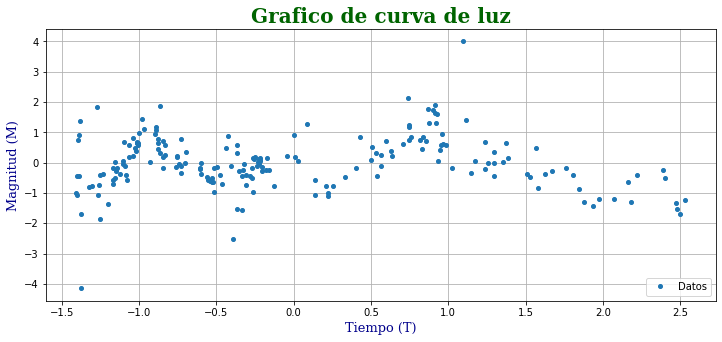

In [16]:
#GRAFICO DE CURVA DE LUZ
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(tiempo,magnitud, 'o',markersize = 4, label = 'Datos')
plt.xlabel('Tiempo (T)', fontname = 'serif', color = 'darkblue',size  = 13)
plt.ylabel('Magnitud (M)', fontname = 'serif', color = 'darkblue',size  = 13)
plt.title('Grafico de curva de luz', fontname ='serif', color = 'darkgreen', size = 20, weight = 'bold')
plt.legend(loc = 'lower right' )
plt.grid()

In [17]:
# FUNCION POLINOMIAL DE GRADO 4
#polinomio de grado 4
polinomio = PolynomialFeatures(degree = 4)
#regrecion lineal 
mo = LinearRegression()
x1 = tiempo.values.reshape(-1,1)
d_polinomio = polinomio.fit_transform(x1)
mo.fit(d_polinomio,magnitud)
x_lin = np.linspace(min(tiempo),max(tiempo)).reshape(-1,1)
data_ply_plot = polinomio.fit_transform(x_lin)
y_pred = mo.predict(data_ply_plot)



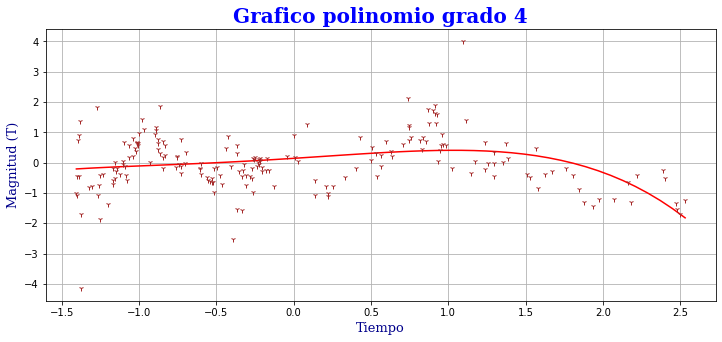

In [18]:
#GRAFICA DE FUNCION
fig, bx = plt.subplots(figsize=(12,5))
plt.plot(x_lin,y_pred, color = 'red', label = 'Datos')
plt.plot(tiempo,magnitud,'1', color = 'brown')
plt.xlabel('Tiempo (T)', fontname = 'serif', color = 'darkblue',size  = 13)
plt.ylabel('Magnitud (T)', fontname = 'serif', color = 'darkblue',size  = 13)
plt.title('Grafico polinomio grado 4', fontname ='serif', color = 'blue', size = 20, weight = 'bold')
plt.grid()
bx.get_xticklabels()
plt.xlabel('Tiempo')
plt.savefig("Grafico polinomio grado 4.jpg")
plt.show()

In [19]:
print('w = ' + str(mo.coef_) + ', b = ' + str(mo.intercept_))

w = [ 0.          0.3270395   0.05583997 -0.06913154 -0.04928595], b = 0.14261927451531708


### Funcion del grafico ajustado 
#### - Grado 4
$f(X) = 0.1426 + X \cdot 0.327 + X^2 \cdot 0.0558 - X^3 \cdot 0.0691- X^4 \cdot 0.0492 $

#### - Grado 5
$f(X) -0.2303 + X \cdot 0.61869247 + X^2 \cdot 1.555 + X^3 \cdot -0.6668 - X^4 \cdot 0.8002 + X^5 \cdot 0.3045 $

#### - Grado 8
$f(X) = -0.4472 + X \cdot 0.7041 + X^2 \cdot 3.2068 - X^3 \cdot 1.0492- X^4 \cdot 2.7276 + X^5 \cdot 0.8787 + X^6 \cdot 0.5479- X^7 \cdot 0.2288 + X^8 \cdot 0.0133$


#### - Grado  9 

$f(X) = -0.3273 + X \cdot 1.11228507 + X^2 \cdot 2.1785 X^3 \cdot-2.52645242 - X^4 \cdot 0.5790 + X^5 \cdot 2.0801
 - X^6 \cdot 1.09557778 - X^7 \cdot 0.33358077 + X^8 \cdot 0.4300 - X^9 \cdot 0.0900 $

#### - Grado  10

$ f(X) = -0.1830 + X \cdot 0.69257286 - X^2 \cdot 0.1547 - X^3 \cdot 0.240 +  X^4 \cdot 4.67086659 - X^5 \cdot2.0597922
 - X^6 \cdot 4.6021 + X^7 \cdot 2.6880 + X^8 \cdot 0.8786 -X^9 \cdot 0.8355 + X^{10} \cdot 0.1415 $


## Imagenes de las graficas ajustadas 

In [20]:
im1 = Image.open('Grafico polinomio grado 4.jpg')
im2 = Image.open('Grafico polinomio grado 5.jpg')
im3 = Image.open('Grafico polinomio grado 8.jpg')
im4 = Image.open('Grafico polinomio grado 9.jpg')
im5 = Image.open('Grafico polinomio grado 10.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'Grafico polinomio grado 5.jpg'

In [ ]:
im3

<p> Sepuede observar que entre mas alto sea el grado del polinomio mejor se ajustará al grafico, por efectos de ejemplo solo se realizaron 5 funciones con los grados, 4,5,8,9 y 10 <p>

## <font color='purple'>  Part 3: Regresión con Penalización <font>

In [ ]:
data_3 = pd.read_csv('ts.csv').sample(200)
x = data_3['magnitud'] 
y = data_3['tiempo']

#asegurar que este en una sola dimension
x = x.values.reshape(-1,1)

In [ ]:
polinomio = PolynomialFeatures(degree = 7)
datapoly = polinomio.fit_transform(x)
datapoly.shape
alpha = [1,00.1,0000.1]
modelo = Ridge(000.1)
modelo.fit(datapoly,y)
y_pred = modelo.predict(datapoly)

In [ ]:
fig, cx = plt.subplots(figsize=(12,5))
plt.plot(x,y_pred, 'o',color = 'red', label = 'Datos')
plt.plot(x,y, '.',color = 'blue', label = 'Datos')
plt.xlabel('Tiempo (T)', fontname = 'serif', color = 'darkgreen',size  = 13)
plt.ylabel('Magnitud (T)', fontname = 'serif', color = 'darkgreen',size  = 13)
plt.title('Diagrama Ridge de grado 7 y alfa = 000.1', fontname ='serif', color = 'blue', size = 20, weight = 'bold')
plt.grid()
plt.xlabel('Tiempo')
plt.savefig("Diagrama Ridge de grado 7 y alfa = 000.1.jpg")
plt.show()

In [ ]:
print('w = ' + str(modelo.coef_) + ', b = ' + str(modelo.intercept_))

10 alpfa 0.1
w = [ 0.00000000e+00  1.79611675e-01  2.15780571e-01  1.06056583e+00
  2.86725560e-01 -2.41705101e+00  3.85379247e-01  1.03717770e+00
 -3.75914528e-01 -3.70066931e-02  2.38447578e-02 -1.72879445e-03], b = -0.19605816144164234

7 alfa 000.1

w = [ 0.          0.06143139  0.52995555 -0.13047099 -0.19409192  0.02143513
  0.01004543 -0.00100414], b = -0.1982937749845075

In [ ]:
polinomio = PolynomialFeatures(degree = 10)
datapoly = polinomio.fit_transform(x)
datapoly.shape
alpha = [1,00.1,0000.1]
modelo = Lasso(0.1)
modelo.fit(datapoly,y)
y_pred = modelo.predict(datapoly)

In [ ]:
fig, cx = plt.subplots(figsize=(12,5))
plt.plot(x,y_pred, 'o',color = 'red', label = 'Datos')
plt.plot(x,y, '.',color = 'blue', label = 'Datos')
plt.xlabel('Tiempo (T)', fontname = 'serif', color = 'darkgreen',size  = 13)
plt.ylabel('Magnitud (T)', fontname = 'serif', color = 'darkgreen',size  = 13)
plt.title('Diagrama Ridge de grado 10 y alfa = 0.1', fontname ='serif', color = 'blue', size = 20, weight = 'bold')
plt.grid()
plt.xlabel('Tiempo')
plt.savefig("Diagrama Lasso de grado 10 y alfa = 0.1.jpg")
plt.show()

In [ ]:
print('w = ' + str(modelo.coef_) + ', b = ' + str(modelo.intercept_))

In [ ]:
7 y alfa 000.1
w = [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.55558955e-04
 -1.94726135e-03  2.26786063e-04 -8.02965790e-06  3.10977984e-07], b = -0.047771753945412346

10 y alfa 0.1

w = [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.55558955e-04
 -1.94726135e-03  2.26786063e-04 -8.02965790e-06  3.10977984e-07], b = -0.047771753945412346

## <font color='Grey'>  Part 4: Regresión con Penalización <font>

In [ ]:
data4 = pd.read_csv('ts2.csv')

In [ ]:
clase  = pd.DataFrame(data4['Class'])
base =   pd.DataFrame(data4.iloc[:,1:])

In [ ]:
# ANALISIS DESCRIPTIVO GLOBAL DEL  DATAFRAME

data4.describe()
data4.columns

In [ ]:
# ANALISIS DESCRIPTIVO 

data4['Class'].describe()
datos = data4.groupby(by = 'Class').count()
data4.groupby(by = 'Class').mean()
clases_estrellas = data4['Class'].value_counts()  #contar cuantas estrellas hay en la columna 
# =========================================================
cep = data4[data4['Class'] == 'cep']
prom_cep = cep['Amplitude'].mean()
max_cep = cep['PercentAmplitude'].max()

In [ ]:
print('Promedio de altitud de la clase de estrella CEP es : ', round(prom_cep,4) )
print('El maximo valor de la columna PercentAmplitude es : ',round(max_cep,4))

In [ ]:
datos.groupby('Class').mean()["Mean"].plot(kind='bar', title ='Grafico de promedio ')
plt.show()

In [ ]:
# CONTAR LOS ELEMENTOS DISTINTOS DE UNA COLUMNA
Clase.value_counts()

#df.education.value_counts()
#where en python 
# for y numpy

In [ ]:
# REMPLAZAR LOS ESTRING DE LA COLUMNA CLASS POR NUMEROS 
data4['Class'].replace({'lpv': 1, 'rrlyr': 2,'ecl':3,'cep': 4,'NonVar':5 ,
                        'dsct': 6, 't2cep':7, 'acep':8, 'dpv':9},  inplace = True)

In [ ]:
# SEPARACION DE BASE DE DATOS 

# Muestra las variables Independientes
x1 = data4.drop(['Amplitude'],axis = 1)
# Muestra de las variables dependientes 
y1 = data4.Amplitude

#DIivision de 75% de los datos para entrenamiento y 25 % de datos para test
X_train, X_test, y_train, y_test = train_test_split(x1, y1,random_state=0)

In [ ]:
#IMPORTACION DE LIBRERIAS
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# MODELO DE BOSQUE ALEATORIO 

modelo1 = RandomForestClassifier(n_estimators = 19,
                               random_state = 2016,
                               min_samples_leaf = 8)

In [ ]:
modelo1.fit(X_train, y_train)

In [ ]:
# Accuracy promedio
modelo1.score(X_test, y_test)

In [ ]:
#MAtriz de cunfucion

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = modelo1.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

## CLASIFICACION KNN

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [9]:
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
dataset = pd.read_csv('ts2.csv')

In [17]:
X = dataset.iloc[:,1:4]
y = dataset['Class']

In [19]:
X_train, X_test, y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 0) #semilla  = 0

In [20]:
# MODELO KNN
clf = KNeighborsClassifier(n_neighbors = 3)

In [22]:
# ENTRENAMIENTO
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = clf.predict(X_test)
y_pred

array(['lpv', 'lpv', 'lpv', ..., 'rrlyr', 'ecl', 'ecl'], dtype=object)

In [40]:
def plt_cm(y_true, y_pred, figsize = (10,10)):
    cm= confusion_matrix(y_true,y_pred, labels = np.unique(y_true))
    cm_sum =  np.sum(cm, axis = 1, keepdims = True)
    cm_perc = cm/cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i,j]
            p = cm_perc[i,j]
            if i == j :
                s = cm_sum[i]
                annot[i,j] = '%.1f%%\n%d/%d' %(p,c,s)
            elif c == 0:
                    annot[i,j] = '0.0%'
            else:
                    annot[i,j] = '%.1f%%\n%d' % (p,c)
    cm = pd.DataFrame(cm,index =np.unique(y_true), columns = np.unique(y_true))
    cm.index.name =  'Valores Verdaderos'
    cm.columns.name =  'Prediccion'
    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(cm, cmap = 'YlGnBu', annot = annot, fmt = '', ax= ax)
                    
            

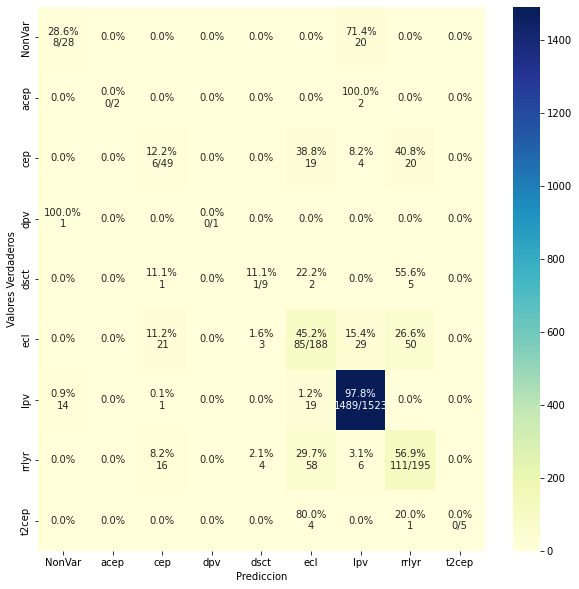

In [41]:
plt_cm(Y_test,y_pred)